In [1]:
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#Read in the dataset
df_raw = pd.read_csv('wdbc.csv')

In [3]:
#Add the proper feature names to the columns
df_raw.columns = ['patient_id', 'label', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'raidus_se', 'texture_se', 'perimiter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [4]:
#General statistical distribution and qualities of the dataset
df_raw.describe()

,patient_id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
#Note the difference in magnitude of different features, visible in the above and below cells; 
#set must be scaled before training

df_raw.head(20)

,patient_id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
5,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
6,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
7,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
8,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750
9,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452


In [6]:
#Set contains no null values
df_raw.isna().sum()

patient_id                 0
label                      0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
raidus_se                  0
texture_se                 0
perimiter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
#Encode the label feature (as it is categorical)
coder = LabelEncoder()

df_nc = df_raw.copy()

df_nc['label'] = coder.fit_transform(df_nc['label'])

#0 is a reading of benign, 1 indicates malignancy in the measured tumor
#df_nc.head(20)
df_nc

,patient_id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
#Scale the data

#Instantiate Scaler
scaler = RobustScaler()

#Create list without the label
X_raw = df_nc.drop(['patient_id', 'label'], axis = 1)

#Scale the lists, one with the label for visualization and one without for training and splitting
#df_scaled = scaler.fit_transform(df_nc)
X_scaled = scaler.fit_transform(X_raw)
X_scaled = pd.DataFrame(X_scaled)

Y = df_nc['label']

In [9]:
X_scaled.columns
X_scaled.columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'raidus_se', 'texture_se', 'perimiter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

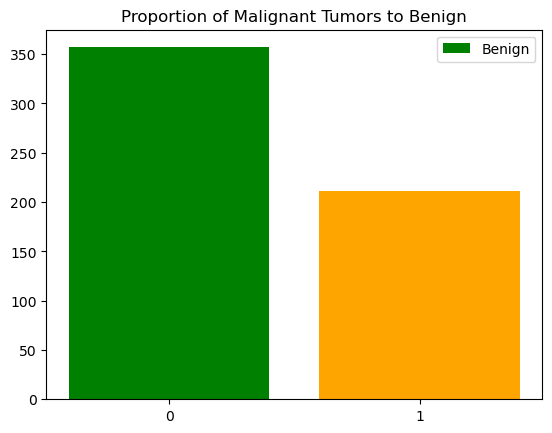

In [10]:
#Question 1: Bivariate plot analysis
#Distribution: target variable radius
plt.bar(x = (0,1), height = (357, 211), tick_label = (0, 1), color = ('green', 'orange'))
plt.legend(["Benign", "Malignant"], loc = 'upper right')
plt.title("Proportion of Malignant Tumors to Benign")
plt.show()

In [11]:
#Y.value_counts()

Text(0.5, 1.0, 'Distributions of the area_mean feature')

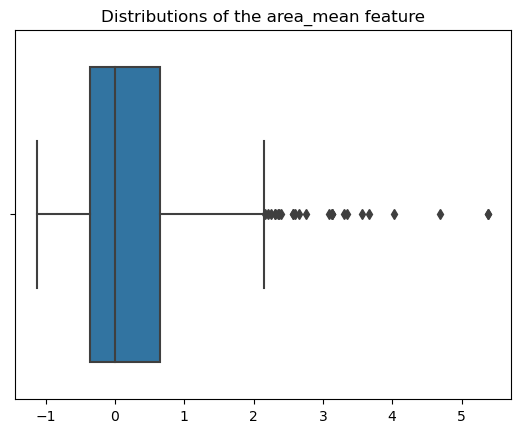

In [12]:
#Analyze the distribution of the area_mean variable
#Notice the prevalence of outliers in this feature
sns.boxplot(data = X_scaled, x = list(X_scaled['area_mean']))
plt.title("Distributions of the area_mean feature")

<Axes: ylabel='area_worst'>

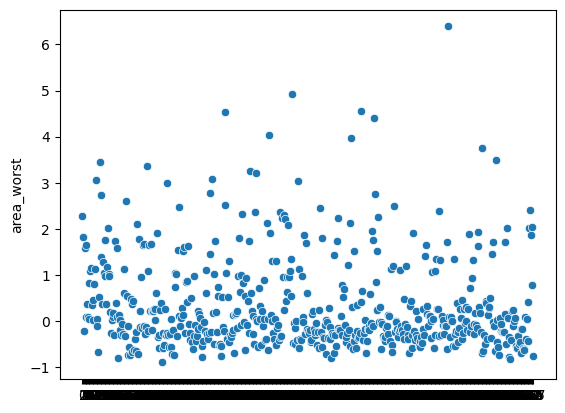

In [13]:
#This plot is garbage, sorry in advance
plt3 = sns.scatterplot(data = X_scaled, x = X_scaled.index, y = 'area_worst')
plt3.set_xticks(X_scaled.index)
plt3.set_xticklabels(X_scaled.index)
plt3

Text(0.5, 1.0, 'Distributions of the area_worst feature')

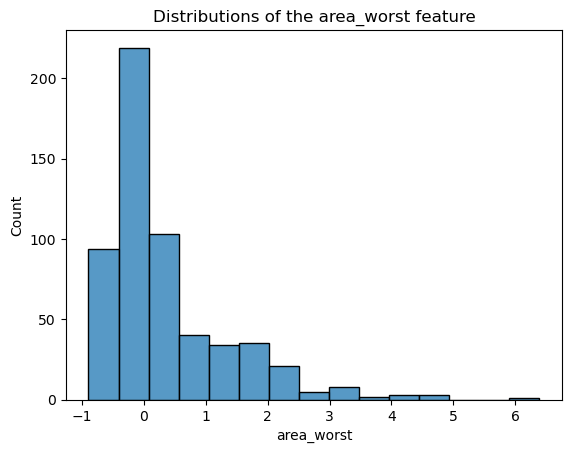

In [14]:
#Distribution: area_worst
#This is an okay 3rd plot for the first question
sns.histplot(data = X_scaled, x = 'area_worst', bins = 15)
plt.title("Distributions of the area_worst feature")

In [15]:
# original train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 13)

# should we normalize the data AFTER train-test split? supplosedly don't want the training data affecting the testing data or vice versa
# similar reason as to why we should conduct feature selection and extraction afte rthe split.

In [16]:
'''
right now the variable names are thus:
X_scaled = the feature list which we can split to train
Y = the encoded target variable, also for training and test splitting

X_train, X_test, y_train, y_test: the training and testing sets, created above with hyperparameters we can later tweak

df_nc = the two above matrices combined (featureset and target) (Includes patient number, be aware of that)

df_raw: the original dataset with no modifications, as it was imported

X_raw: raw feature set but without the target label or the irrelevant patient ID
'''

'\nright now the variable names are thus:\nX_scaled = the feature list which we can split to train\nY = the encoded target variable, also for training and test splitting\n\nX_train, X_test, y_train, y_test: the training and testing sets, created above with hyperparameters we can later tweak\n\ndf_nc = the two above matrices combined (featureset and target) (Includes patient number, be aware of that)\n\ndf_raw: the original dataset with no modifications, as it was imported\n\nX_raw: raw feature set but without the target label or the irrelevant patient ID\n'

In [17]:
# duplicate the training set so there are 9 total instances.
# each instance will go through a different preprocessing pipeline

'''
X_train_CFS = X_train.copy()
y_train_CFS = y_train.copy()

X_train_RFE = X_train.copy()
y_train_RFE = y_train.copy()

X_train_LDA = X_train.copy()
y_train_LDA = y_train.copy()

X_train_PCA = X_train.copy()
y_train_PCA = y_train.copy()

X_train_CFS_LDA = X_train.copy()
y_train_CFS_LDA = y_train.copy()

X_train_CFS_PCA = X_train.copy()
y_train_CFS_PCA = y_train.copy()

X_train_RFE_LDA = X_train.copy()
y_train_RFE_LDA = y_train.copy()

X_train_RFE_PCA = X_train.copy()
y_train_RFE_PCA = y_train.copy()
'''

# since these are deep copies, we still have our original X_train and Y_train as a control

# this block may be unnecesary as we can create copies during application, are they deep though?

'\nX_train_CFS = X_train.copy()\ny_train_CFS = y_train.copy()\n\nX_train_RFE = X_train.copy()\ny_train_RFE = y_train.copy()\n\nX_train_LDA = X_train.copy()\ny_train_LDA = y_train.copy()\n\nX_train_PCA = X_train.copy()\ny_train_PCA = y_train.copy()\n\nX_train_CFS_LDA = X_train.copy()\ny_train_CFS_LDA = y_train.copy()\n\nX_train_CFS_PCA = X_train.copy()\ny_train_CFS_PCA = y_train.copy()\n\nX_train_RFE_LDA = X_train.copy()\ny_train_RFE_LDA = y_train.copy()\n\nX_train_RFE_PCA = X_train.copy()\ny_train_RFE_PCA = y_train.copy()\n'

In [18]:
# preprocessing feature selection technique CFS application

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Feature selection using CFS
def cfs(X, y, k_features):
    # Calculate the mutual information between each feature and the target
    mi_scores = mutual_info_classif(X, y)
    
    # Rank features based on mutual information scores
    ranked_features = np.argsort(mi_scores)[::-1]
    
    # Select the top k features
    selected_features = ranked_features[:k_features]
    
    return selected_features

# Specify the number of features to select
# will need to experiment and see which number is optimal
k_features_to_select = 6

# Perform CFS feature selection
selected_features = cfs(X_train, y_train, k_features_to_select)

# Select only the relevant features from the dataset
X_train_CFS = X_train.iloc[:, selected_features]
X_test_CFS = X_test.iloc[:, selected_features]

In [19]:
# preprocessing feature selection technique RFE application

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Create a base classifier
clf = RandomForestClassifier(random_state=42)

# Specify the number of features to select
# will need to experiment and see which number is optimal
k_features_to_select = 6

# Perform RFE feature selection
# could use the RFECV class, which automatically performs cross-validation to find the optimal number of features
rfe = RFE(estimator=clf, n_features_to_select=k_features_to_select)
X_train_RFE = rfe.fit_transform(X_train, y_train)
X_test_RFE = rfe.transform(X_test)

In [20]:
# preprocessing feature extraction technique PCA application

from sklearn.decomposition import PCA

# Specify the number of components (features) to select
# will need to experiment and see which number is optimal
n_components_to_select = 6

# Perform PCA for feature selection
pca = PCA(n_components=n_components_to_select)

X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

print(pca.explained_variance_ratio_)

X_train_CFS_PCA = pca.fit_transform(X_train_CFS)
X_test_CFS_PCA = pca.transform(X_test_CFS)

print(pca.explained_variance_ratio_)

X_train_RFE_PCA = pca.fit_transform(X_train_RFE)
X_test_RFE_PCA = pca.transform(X_test_RFE)

print(pca.explained_variance_ratio_)

[0.46687899 0.1845013  0.10743732 0.05028753 0.04293447 0.03888296]
[8.80427717e-01 9.22401855e-02 1.64019651e-02 6.42631439e-03
 3.84250350e-03 6.61314720e-04]
[8.80427717e-01 9.22401855e-02 1.64019651e-02 6.42631439e-03
 3.84250350e-03 6.61314720e-04]


In [21]:
# preprocessing feature extraction technique LDA application

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Specify the number of components (features) to select
# will need to experiment and see which number is optimal
n_components_to_select = 1

# Perform LDA for feature selection
lda = LinearDiscriminantAnalysis(n_components=n_components_to_select)
X_train_LDA = lda.fit_transform(X_train, y_train)
X_test_LDA = lda.fit_transform(X_test, y_test)

X_train_CFS_LDA = lda.fit_transform(X_train_CFS, y_train)
#X_test_CFS_LDA = lda.transform(X_test_CFS)
X_test_CFS_LDA = lda.fit_transform(X_test_CFS, y_test)

X_train_RFE_LDA = lda.fit_transform(X_train_RFE, y_train)
#X_test_RFE_LDA = lda.transform(X_test_RFE)
X_test_RFE_LDA = lda.fit_transform(X_test_RFE, y_test)

In [22]:
# we now have 9 total x_train's including a control

'''
X_train
X_train_CFS
X_train_RFE
X_train_LDA
X_train_PCA
X_train_CFS_LDA
X_train_CFS_PCA
X_train_RFE_LDA
X_train_RFE_PCA
'''

train_list = [X_train, X_train_CFS, X_train_RFE, X_train_LDA, X_train_PCA, X_train_CFS_LDA, X_train_CFS_PCA, X_train_RFE_LDA, X_train_RFE_PCA]
test_list = [X_test, X_test_CFS, X_test_RFE, X_test_LDA, X_test_PCA, X_test_CFS_LDA, X_test_CFS_PCA, X_test_RFE_LDA, X_test_RFE_PCA]

# will we need a matching y_train for each? not currently implemeneted
# we might need to adjust the test variables after based on the new columns in all of these
# it seems it's best practice though to only manipulate the training data as if you had no access to test data

In [23]:
#Random Forest Classification
rfc = RandomForestClassifier(random_state=13)
i = 0

#For every training set in the preprocessing outputs
for train_set in train_list:
    
    #fit the model to the current training set
    rfc.fit(train_set, y_train)
    
    #Print the tested accuracy
    print(rfc.score(test_list[i], y_test))
    
    #iterate the index variable which grabs the target set associated with the current testing set
    i += 1

0.9298245614035088
0.9122807017543859
0.8947368421052632
0.9649122807017544
0.9649122807017544
0.15789473684210525
0.9210526315789473
0.8947368421052632
0.9210526315789473


In [24]:
# I believe that while a loop accessing these variables from a list in order to iteratively build each classifier
# with each variable is a good idea, I do not believe it will be easy to pull of because of the block sections of the notebook
# I think we may have to simply hardcode each classification model so we can get more frequent printouts
# I hope I am wrong

In [41]:
# classification model 1: Logistic Regression

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

#instantiate a Logistic Regression Model
logreg = LogisticRegression(max_iter = 1000)

i = 0

#For every training set in the preprocessing outputs
for train_set in train_list:
    
    #fit the model to the current training set
    logreg.fit(train_set, y_train)
    
    #Print the tested accuracy
    print(logreg.score(test_list[i], y_test))
    
    #iterate the index variable which grabs the target set associated with the current testing set
    i += 1

'''
#Best cutoff value recorded so far and its associated accuracy
threshold_best = 0.0
accuracy_best = 0.0

#local loop placeholder variable
local_cutoff = 0.0

#loop through every decimal hundreths place between 1 and 99 to find the optimal cutoff value
for i in range(1, 100, 1):
    #move iterator to hundreths place so the cutoffs are inclusively between .01 and .99
    cutoff = i/100
    
    #Predict with the chosen cutoff variable
    prob_of_1 = (logreg.predict_proba(logTrainX)[:,1] >= cutoff).astype(int)
    
    #Update local value with the accuracy of the iterated threshold
    local_cutoff = np.sum(logTrainY == prob_of_1)/700
    
    #check if the predicted accuracy with local threshold is better than the stored value
    if local_cutoff > accuracy_best:
        threshold_best = cutoff
        accuracy_best = local_cutoff

#Training set performances
print("Default Accuracy:", fit.score(logTrainX, logTrainY))
print("Best Threshold Found: ", threshold_best)
print("Accuracy of best cutoff: ", accuracy_best)

#Test the model on testing data with the best threshold found
test_prob_of_1 = (logreg.predict_proba(logTestX)[:,1] >= threshold_best).astype(int)

print("Default Accuracy on Testing:", fit.score(logTestX, logTestY))
print('Accuracy on Testing with Custom Threshold: {:.3f}'.format(np.sum(logTestY == test_prob_of_1)/300))
''';

0.9736842105263158
0.9210526315789473
0.9210526315789473
0.9736842105263158
0.9736842105263158
0.14035087719298245
0.9210526315789473
0.9385964912280702
0.9210526315789473


In [26]:
# classification model 2: Decision Tree

from sklearn import tree as DT

tree1 = DT.DecisionTreeClassifier(min_samples_leaf = 12, max_depth = 6)
tree1.fit(trainX, trainY)

print('the accuracy rate on training data is', tree1.score(trainX, trainY))
print('the accuracy rate on testing data is', tree1.score(testX, testY))

NameError: name 'trainX' is not defined

In [27]:
# classification model 3: Random Forest

from sklearn import ensemble

# create the random forest and fit/score it
forest1 = ensemble.RandomForestClassifier(n_estimators = 10, max_depth = 2, random_state = 1000)

forest1 = forest1.fit(trainX, trainY)

print('the accuracy rate on training data is', forest1.score(trainX, trainY))

print('the accuracy rate on testing data is', forest1.score(testX, testY))

from sklearn import tree
import graphviz

graph = tree.export_graphviz(forest1.estimators_[0], out_file=None, 
            feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],
            class_names = ['setosa', 'versicolor', 'virginica']  ,                        
            filled=True, rounded=True,  
            special_characters=True)  
graph2 = graphviz.Source(graph)  
graph2

NameError: name 'trainX' is not defined

In [42]:
# classification model 4: SVM

from sklearn import svm

lsvm = svm.SVC(kernel='linear', C=10)

i = 0

#For every training set in the preprocessing outputs
for train_set in train_list:
    
    #fit the model to the current training set
    lsvm.fit(train_set, y_train)
    
    #Print the tested accuracy
    print(lsvm.score(test_list[i], y_test))
    
    #iterate the index variable which grabs the target set associated with the current testing set
    i += 1

'''
lsvm.fit(X,Y)
sv = lsvm.support_vectors_
print(sv)
print(lsvm.coef_, lsvm.intercept_)
plt.scatter(X[:,0],X[:,1],c='blue')
plt.scatter(sv[:,0],sv[:,1],c='red')
plt.plot([0,-lsvm.intercept_/lsvm.coef_[0,1]],[-lsvm.intercept_/lsvm.coef_[0,0],0])
plt.show()
# lsvm.coef_, lsvm.intercept_
''';

0.9649122807017544
0.9298245614035088
0.9298245614035088
0.9736842105263158
0.9649122807017544
0.14912280701754385
0.9298245614035088
0.9385964912280702
0.9298245614035088


In [40]:
# classification model 5: Neural Network
from sklearn.neural_network import MLPClassifier

#creating a neural net 
#trained with stochastic gradient descent
#activation function is sigmoid
#two hidden layers with 5 and 5 hidden neurons
#learning rate is 0.1
#train the nn in at most 1000 iterations (epochs)

index = 0

nn = MLPClassifier(activation='logistic',
                   solver='sgd',
                   batch_size=25,
                   hidden_layer_sizes=(5, 5),
                   learning_rate_init=0.1,
                   max_iter=1000,
                   random_state=123456)

print("Neural Network Accuracies\n")

for train_set in train_list:
    nn.fit(train_set,y_train)

    print("The accuracy rate in training data is #{} is {}".format(index+1, nn.score(train_set,y_train)))
    print("The accuracy rate in testing data is #{} is {}".format(index+1, nn.score(test_list[index],y_test)))
    print("\n")
    
    index += 1

Neural Network Accuracies

the accuracy rate in training data is #1 is 1.0
the accuracy rate in testing data is #1 is 0.9649122807017544


the accuracy rate in training data is #2 is 0.9713656387665198
the accuracy rate in testing data is #2 is 0.9298245614035088


the accuracy rate in training data is #3 is 0.9713656387665198
the accuracy rate in testing data is #3 is 0.9210526315789473


the accuracy rate in training data is #4 is 0.9845814977973568
the accuracy rate in testing data is #4 is 0.9736842105263158


the accuracy rate in training data is #5 is 0.9955947136563876
the accuracy rate in testing data is #5 is 0.9649122807017544


the accuracy rate in training data is #6 is 0.9559471365638766
the accuracy rate in testing data is #6 is 0.14912280701754385


the accuracy rate in training data is #7 is 0.9713656387665198
the accuracy rate in testing data is #7 is 0.9473684210526315


the accuracy rate in training data is #8 is 0.9559471365638766
the accuracy rate in testing data i

In [ ]:
# classification model 6: XGBoost Tree

import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create an XGBoost classifier
clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Optionally, you can also print feature importances
print("Feature Importances:")
for feature, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{feature}: {importance}")
